In [101]:
import keras
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras import models

In [102]:
os.listdir()

['test_img.jpg',
 'style_1.ipynb',
 'starry_night.jpg',
 '.ipynb_checkpoints',
 'test_img1.jpg']

In [103]:
style_img = os.listdir()[2]
content_img = os.listdir()[0]

In [104]:
content=cv2.resize(cv2.imread(content_img),(int(200),int(200)))
img=cv2.resize(cv2.imread(style_img),(int(200),int(200)))
img.shape, content.shape

((200, 200, 3), (200, 200, 3))

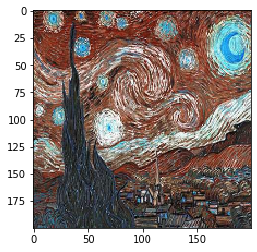

In [105]:
plt.imshow(img)
plt.show()

In [106]:
# layers for extracting feature maps:-

# only one layer for content_feature_map:-(1)
content_layers = ["block5_conv2"]

# more than one layer for style_feature maps:-(5)
style_layers =[ 'block1_conv1',
               'block2_conv1',
               'block3_conv1', 
               'block4_conv1', 
               'block5_conv1'
            ]

In [107]:
# VGG19 model for conv layers( these layers are extracting feature maps):-
from keras.applications import VGG19
model = VGG19(weights ="imagenet",
             include_top = False,
             )
#model.summary()

In [108]:
model.trainable = False

In [109]:
def get_model():
    style = [model.get_layer(name).output for name in style_layers]
    content = [model.get_layer(name).output for name in content_layers]
    model_output = style + content
    return models.Model(model.input,model_output)

In [110]:
style

[<tf.Tensor 'block1_conv1/Relu:0' shape=(?, ?, ?, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1/Relu:0' shape=(?, ?, ?, 128) dtype=float32>,
 <tf.Tensor 'block3_conv1/Relu:0' shape=(?, ?, ?, 256) dtype=float32>,
 <tf.Tensor 'block4_conv1/Relu:0' shape=(?, ?, ?, 512) dtype=float32>,
 <tf.Tensor 'block5_conv1/Relu:0' shape=(?, ?, ?, 512) dtype=float32>]

In [129]:
m = get_model()
t=m(img)

In [112]:
img = np.asarray(img,dtype='float32')
img = np.expand_dims(img,axis=0)
type(img)
img.shape

(1, 200, 200, 3)

In [113]:
img=tf.convert_to_tensor(img)

In [156]:
t[0]

<tf.Tensor 'model_11/block1_conv1/Relu:0' shape=(1, 200, 200, 64) dtype=float32>

In [158]:
def gram_matrix(input_tensor):
    # We make the image channels first 
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)

In [160]:
gram_matrix(t[0][0])

<tf.Tensor 'truediv:0' shape=(64, 64) dtype=float32>

In [167]:
sess = tf.Session()
with sess.as_default():
    tf.initialize_all_variables().run()
    print(gram_matrix(t[0][0]).eval())

[[2.7408962e+03 5.5496802e+03 4.0164497e-01 ... 2.0647368e+03
  5.0820768e-01 4.3289056e-01]
 [5.5496802e+03 1.1479536e+04 1.1024225e+00 ... 4.2550259e+03
  9.0172911e-01 6.2110889e-01]
 [4.0164497e-01 1.1024225e+00 9.9908791e-02 ... 5.6943583e-01
  2.1837969e-04 5.5324685e-06]
 ...
 [2.0647368e+03 4.2550259e+03 5.6943583e-01 ... 1.7161715e+03
  5.7068956e-01 3.6150926e-01]
 [5.0820768e-01 9.0172911e-01 2.1837969e-04 ... 5.7068956e-01
  8.3574228e-02 4.4741957e-03]
 [4.3289056e-01 6.2110889e-01 5.5324685e-06 ... 3.6150926e-01
  4.4741957e-03 6.3332237e-02]]
